In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
df = gpd.read_file("~/Dacon/MOCT_LINK.shp")

In [6]:
df.crs

<Projected CRS: PROJCS["ITRF2000_Central_Belt_60",GEOGCS["ITRF2000 ...>
Name: ITRF2000_Central_Belt_60
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: International Terrestrial Reference Frame 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

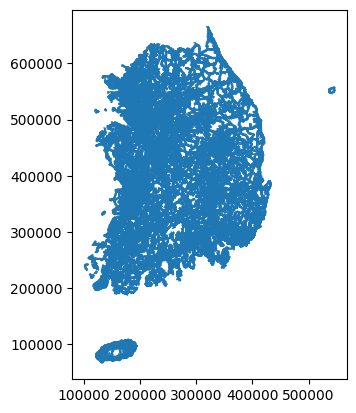

In [7]:
df.plot()

In [10]:
df = df.to_crs(epsg=4326)

In [12]:
df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [16]:
df

,LINK_ID,F_NODE,T_NODE,LANES,ROAD_RANK,ROAD_TYPE,ROAD_NO,ROAD_NAME,ROAD_USE,MULTI_LINK,...,REST_VEH,REST_W,REST_H,C-ITS,LENGTH,UPDATEDATE,REMARK,HIST_TYPE,HISTREMARK,geometry
0,2333122000,2330041100,2330043700,1,107,000,-,Á¦¾Ï°íÁÖ·Î,0,0,...,0,0,0,0,1183.982106,20230519,None,None,None,"LINESTRING (126.88926 37.12547, 126.88918 37.1..."
1,3080340700,3080111800,3080111000,1,107,000,-,¿ë¿¬±æ,0,0,...,0,0,0,0,795.566526,20230519,None,None,None,"LINESTRING (126.97675 35.99939, 126.97640 35.9..."
2,3070212800,3070076600,3070077300,1,107,000,-,µ¿·É±æ,0,0,...,0,0,0,0,130.307882,20230519,None,None,None,"LINESTRING (126.71517 35.98788, 126.71393 35.9..."
3,4130354400,4130079400,4130086600,1,104,000,-,¿Í·æ·Î,0,0,...,0,0,0,0,688.011348,20230519,None,None,None,"LINESTRING (127.25387 36.56325, 127.25390 36.5..."
4,4150113900,4150043000,4150041700,3,107,000,-,Ã¢ÀÌ´ë·Î,0,0,...,0,0,0,0,511.532477,20230519,None,None,None,"LINESTRING (128.70202 35.21878, 128.70093 35.2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548663,2333326002,2330126500,2330293900,1,107,000,-,¸ÅÇâ¼®Ãµ·Î,0,0,...,0,0,0,0,682.558842,20230519,None,None,None,"LINESTRING (126.77050 37.04003, 126.77087 37.0..."
548664,2030060500,2030027400,2030027600,4,107,000,-,±¤±³Áß¾Ó·Î,0,0,...,0,0,0,0,224.403281,20230519,None,None,None,"LINESTRING (127.05455 37.28359, 127.05625 37.2..."
548665,3080338800,3080129900,3080132300,1,107,000,-,¿ëµ¿·Î,0,0,...,0,0,0,0,1371.247747,20230519,None,None,None,"LINESTRING (127.00995 36.09859, 127.00995 36.0..."
548666,3620319600,3620113600,3620113800,1,107,000,-,°í¿î»ç±æ,0,0,...,0,0,0,0,1403.269761,20230519,None,None,None,"LINESTRING (128.72150 36.45901, 128.72184 36.4..."


In [20]:
sample = df.iloc[0,:]
sample

LINK_ID                                              2333122000
F_NODE                                               2330041100
T_NODE                                               2330043700
LANES                                                         1
ROAD_RANK                                                   107
ROAD_TYPE                                                   000
ROAD_NO                                                       -
ROAD_NAME                                            Á¦¾Ï°íÁÖ·Î
ROAD_USE                                                      0
MULTI_LINK                                                    0
CONNECT                                                       0
MAX_SPD                                                      40
REST_VEH                                                      0
REST_W                                                        0
REST_H                                                        0
C-ITS                                   

In [22]:
import folium
# Create the map and add the line
m = folium.Map(location=[41.9, -97.3], zoom_start=4)

folium.PolyLine(
    locations=sample['geometry'],
    color="#FF0000",
    weight=5,
    tooltip="From Boston to San Francisco",
).add_to(m)

m

TypeError: Locations should be an iterable with coordinate pairs, but instead got <LINESTRING (126.889 37.125, 126.889 37.126, 126.889 37.126, 126.889 37.126,...>.

In [25]:
M = folium.Map(location=[36.807438,127.144504], zoom_start=7,tiles="Cartodb Positron")
# 도로를 지도에 추가
folium.PolyLine(
    locations=[(coord[1], coord[0]) for coord in linestring.coords],
    color='red',
    weight=2,
    opacity=0.8,
    tooltip=f"도로명: {sample['ROAD_NAME']}"
).add_to(M)
M

NameError: name 'linestring' is not defined

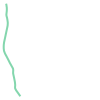

In [26]:
sample["geometry"]